In [1]:
import torch
from torch.autograd import Variable
import pandas as pd

import torch.nn as nn
import torch.optim as optim

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:

df = pd.read_csv('weatherHistory.csv')

In [4]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [19]:
x=df.iloc[:10000,:-1]
y=df.iloc[:10000,-1]

In [20]:
df.dtypes

Summary                       int32
Precip Type                   int32
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                 int32
dtype: object

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)  
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [24]:
class LinearRegression(nn.Module):
    def __init__(self,input_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_size,1)
    def forward(self,x):
        return self.linear(x)

In [25]:
input_size  = x_train.shape[1]
model = LinearRegression(input_size)
criteria = nn.MSELoss()
optimizer  = optim.SGD(model.parameters(),lr=0.01)

In [26]:
num_epoch = 200
train = []
test = []

In [27]:
for i in range(num_epoch):
    output = model(x_train)
    loss = criteria(output,y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        model.eval()
        y_pred_test = model(x_test)
        test_loss = criteria(y_pred_test,y_test)
    
    train.append(loss.item())
    test.append(test_loss.item())

d:\k7\sem6\DL lab\.venv\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7000])) that is different to the input size (torch.Size([7000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\k7\sem6\DL lab\.venv\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [28]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import matplotlib.pyplot as plt

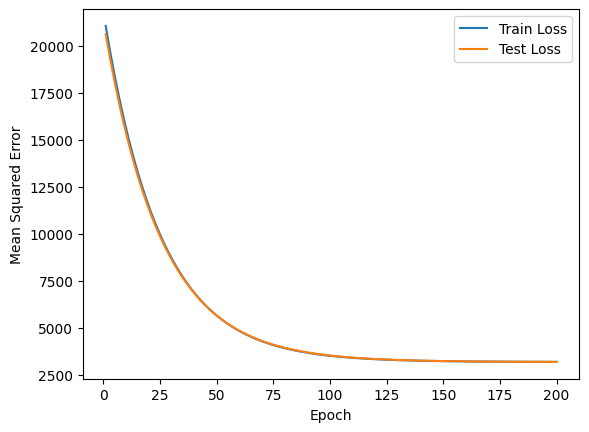

In [30]:
plt.plot(range(1,200+1),train,label='Train Loss')
plt.plot(range(1,200+1),test,label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()